#### 1. Nhập các thư viện

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.mixture import BayesianGaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('../ThucHanh2/Gia SMP va SMPcap 2021(Giá thị trường SMP).csv', encoding='latin-1', sep=';')
df.head(20)

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
5,01/06/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
6,01/07/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
7,01/08/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
8,01/09/2021,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,...,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1,1064.1
9,01/10/2021,966.7,966.7,966.7,966.7,966.7,966.7,966.7,966.7,966.7,...,966.8,966.8,966.8,966.8,966.8,966.8,966.7,966.7,966.7,966.7


In [35]:
feats = ['5','6']

In [36]:
selected_data = df[feats]
print(selected_data.head(20))

         5       6
0    964.4   964.4
1   1019.7  1019.7
2    988.4   988.4
3   1002.0  1002.0
4   1061.5  1061.5
5   1061.5  1061.5
6   1061.5  1061.5
7   1061.5  1061.5
8   1064.1  1064.1
9    966.7   966.7
10  1002.0  1002.0
11  1066.6  1066.6
12  1061.5  1061.5
13  1061.5  1061.5
14  1061.5  1061.5
15  1066.6  1066.6
16   988.4   988.4
17  1058.0  1058.0
18  1069.4  1069.4
19  1069.4  1069.4


#### 2. Sử dụng Bayesian Gaussian Mixture

In [7]:
transformer = StandardScaler()

# Trích xuất các cột trong feats từ DataFrame và chuẩn hóa chúng
X = transformer.fit_transform(df[feats])

# Tạo DataFrame mới từ kết quả chuẩn hóa
df_scaled = pd.DataFrame(X, columns=feats)

# In 5 giá trị đầu tiên của DataFrame sau khi chuẩn hóa
print(df_scaled.head())

          5         6
0 -0.722161 -0.722161
1 -0.195507 -0.195507
2 -0.493595 -0.493595
3 -0.364075 -0.364075
4  0.202578  0.202578


In [8]:
# dữ liệu sau khi scale
X[:5]

array([[-0.72216096, -0.72216134],
       [-0.19550725, -0.19550736],
       [-0.49359515, -0.49359542],
       [-0.36407453, -0.36407473],
       [ 0.20257818,  0.20257829]])

Elbow Method to determine the number of clusters to be formed:


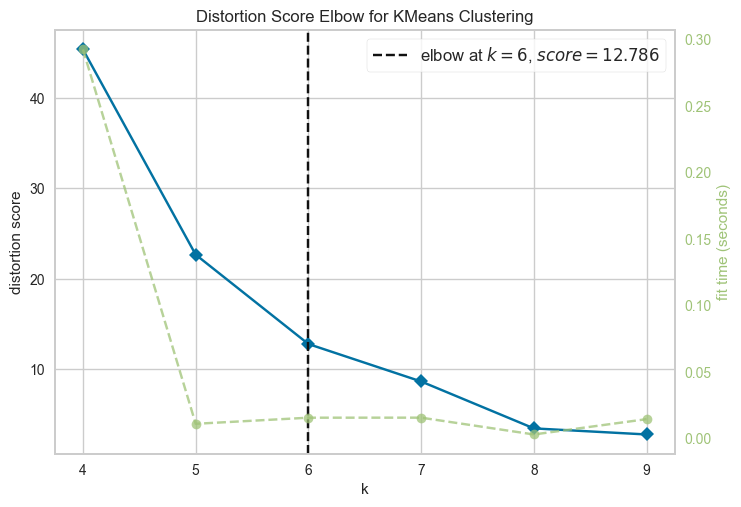

In [9]:
# sử dụng pp elbow xác định số cụm
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(random_state=23), k=(4,10))
Elbow_M.fit(X)
Elbow_M.show();

In [10]:
# thử nghiệm với k=6
BGM = BayesianGaussianMixture(n_components=6,covariance_type='full',random_state=1,n_init=12)
# fit model and predict clusters
preds = BGM.fit_predict(X)
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= preds

In [11]:
pp=BGM.predict_proba(X)
df_new=pd.DataFrame(X,columns=feats) 
df_new[[f'predict_proba_{i}' for i in range(6)]]=pp 
df_new['preds']=preds
df_new['predict_proba']=np.max(pp,axis=1)
df_new['predict']=np.argmax(pp,axis=1)
    
train_index=np.array([])
for n in range(6):
    n_inx=df_new[(df_new.preds==n) & (df_new.predict_proba > 0.68)].index
    train_index = np.concatenate((train_index, n_inx))

In [12]:
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
X_new=df_new.loc[train_index][feats]
y=df_new.loc[train_index]['preds']

params_lgb = {'learning_rate': 0.06,'objective': 'multiclass','boosting': 'gbdt','n_jobs': -1,'verbosity': -1, 'num_classes':7} 

model_list=[]

gkf = StratifiedKFold(11)
for fold, (train_idx, valid_idx) in enumerate(gkf.split(X_new,y)):   

    tr_dataset = lgb.Dataset(X_new.iloc[train_idx],y.iloc[train_idx],feature_name = feats)
    vl_dataset = lgb.Dataset(X_new.iloc[valid_idx],y.iloc[valid_idx],feature_name = feats)
    
    model = lgb.train(params = params_lgb, 
                train_set = tr_dataset, 
                valid_sets =  vl_dataset, 
                num_boost_round = 5000, 
                callbacks=[ lgb.early_stopping(stopping_rounds=300, verbose=False), lgb.log_evaluation(period=200)])  
    
    model_list.append(model) 

[200]	valid_0's multi_logloss: 0.000151726
[400]	valid_0's multi_logloss: 0.000151726
[200]	valid_0's multi_logloss: 0.000153686
[400]	valid_0's multi_logloss: 0.000153686
[200]	valid_0's multi_logloss: 0.000154034
[400]	valid_0's multi_logloss: 0.000154034
[200]	valid_0's multi_logloss: 0.000156754
[400]	valid_0's multi_logloss: 0.000156754
[200]	valid_0's multi_logloss: 0.000153261
[400]	valid_0's multi_logloss: 0.000153261
[200]	valid_0's multi_logloss: 0.00015524
[400]	valid_0's multi_logloss: 0.00015524
[200]	valid_0's multi_logloss: 0.000155472
[400]	valid_0's multi_logloss: 0.000155472
[200]	valid_0's multi_logloss: 9.92419e-06
[400]	valid_0's multi_logloss: 9.8222e-06
[600]	valid_0's multi_logloss: 9.75475e-06
[800]	valid_0's multi_logloss: 9.70667e-06
[1000]	valid_0's multi_logloss: 9.67072e-06
[1200]	valid_0's multi_logloss: 9.64285e-06
[1400]	valid_0's multi_logloss: 9.62062e-06
[1600]	valid_0's multi_logloss: 9.60248e-06
[1800]	valid_0's multi_logloss: 9.5874e-06
[2000]	val

In [13]:
lgb_preds=0
for model in model_list:
    lgb_preds+=model.predict(df_new[feats])

In [14]:
labels=np.argmax(lgb_preds,axis=1)

In [15]:
# nhãn của từng điểm dữ liệu sau khi trainning
labels

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,

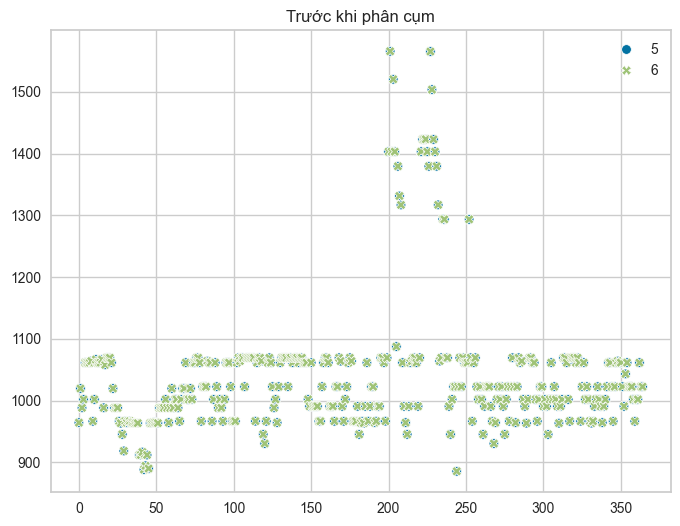

In [16]:
ig = plt.figure(figsize=(8,6))
ax = plt.subplot(label="bla")
sns.scatterplot(df[feats], marker='o');
ax.set_title("Trước khi phân cụm");

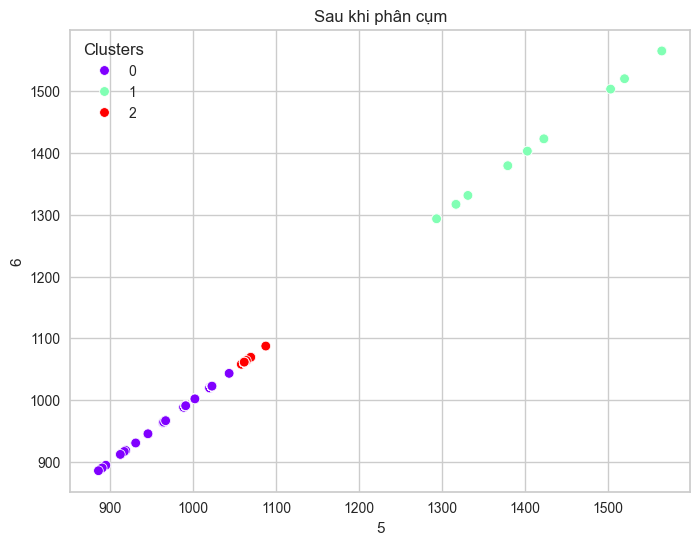

In [17]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

# Vẽ scatter plot với màu được tô theo cụm
sns.scatterplot(x=df[feats[0]], y=df[feats[1]], hue=df["Clusters"], palette="rainbow", marker='o', ax=ax)

# Đặt tiêu đề cho biểu đồ
ax.set_title("Sau khi phân cụm")

# Hiển thị biểu đồ
plt.show()

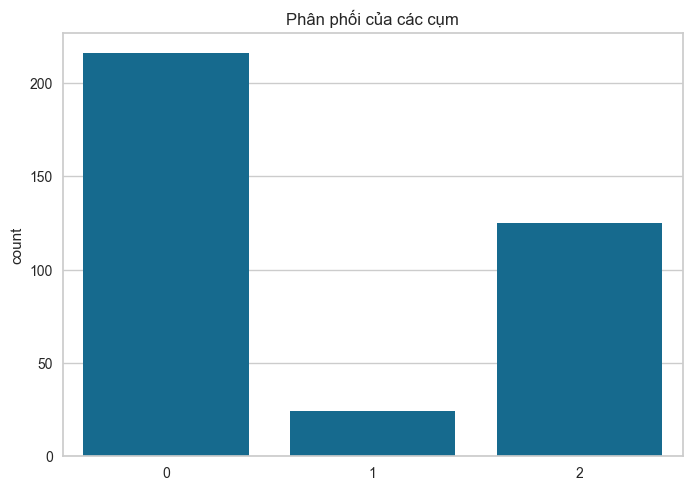

In [18]:
pl = sns.countplot(x=np.argmax(lgb_preds,axis=1))
pl.set_title("Phân phối của các cụm")
plt.show()

#### 3.Sử dụng LSTM dự đoán giá trị tương lai

In [19]:
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [20]:
selected_cols = ['5', '6']
selected_cols.insert(0, df.columns[0])
selected_df = df[selected_cols]

In [21]:
print(selected_df.head())


         Ngày       5       6
0  01/01/2021   964.4   964.4
1  01/02/2021  1019.7  1019.7
2  01/03/2021   988.4   988.4
3  01/04/2021  1002.0  1002.0
4  01/05/2021  1061.5  1061.5


In [25]:
# chuyển format ngày
df['Ngày'] = pd.to_datetime(df['Ngày'], format='%d/%m/%Y')
df.sort_values(by='Ngày', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [27]:
# tạo số dữ liệu test bằng tháng 12
test_size = df[df['Ngày'].dt.month==12].shape[0]
test_size

31

##### Biểu đồ thể hiện train và test trước khi dự đoán

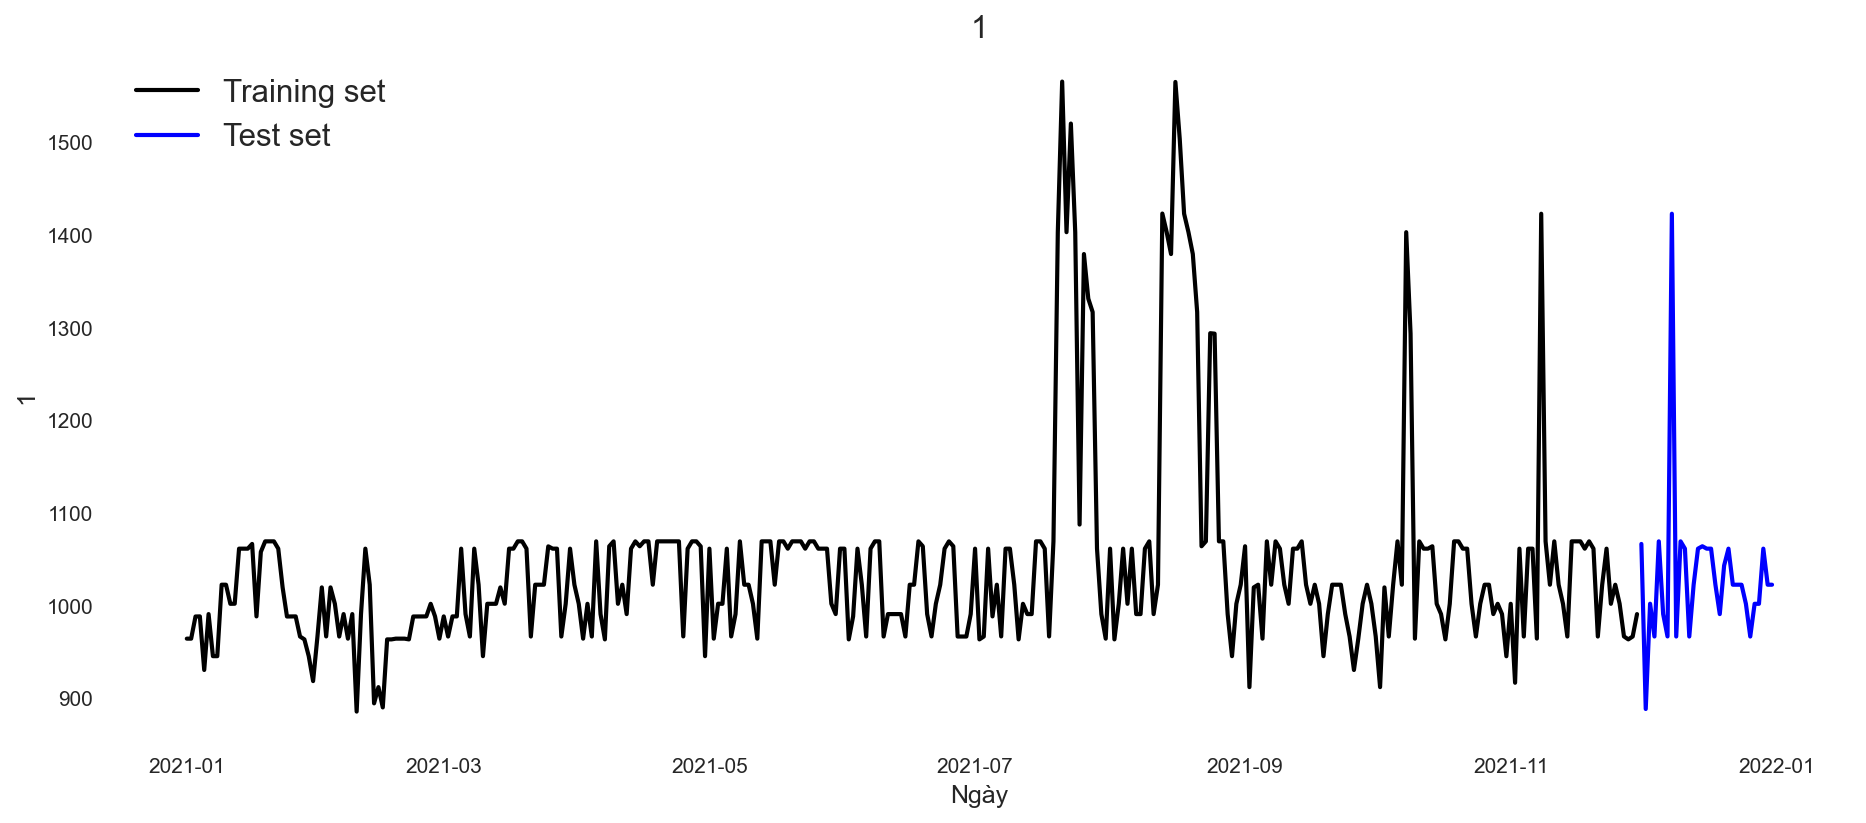

In [29]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['Ngày'][:-test_size], df['1'][:-test_size], color='black', lw=2)
plt.plot(df['Ngày'][-test_size:], df['1'][-test_size:], color='blue', lw=2)
plt.title('1', fontsize=15)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('1', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [30]:
import plotly.express as px
fig = px.line(y=df['1'], x=df['Ngày'])
fig.update_traces(line_color='black') 
fig.update_layout(xaxis_title="Ngày", 
                  yaxis_title="1",
                  title={'text': "Ngày", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(53,223,0,0.8)')

##### Sử dụng MinMaxScaler để đưa dữ liệu về khoảng 0-1

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df['1'].values.reshape(-1,1))

MinMaxScaler()

In [45]:
# Sử dụng MinMaxScaler để chuẩn hóa các cột đã chọn về khoảng 0-1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)
scaled_df = pd.DataFrame(scaled_data, columns=feats)
#print(scaled_df.head(20))
# Định nghĩa kích thước cửa sổ
window_size = 5

# Chuẩn bị dữ liệu huấn luyện
train_data = df['1'].values[:-window_size]
scaler.fit(train_data.reshape(-1, 1))
train_data_scaled = scaler.transform(train_data.reshape(-1, 1))

# Hàm để tạo dữ liệu cửa sổ
def create_windowed_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Tạo dữ liệu huấn luyện với cửa sổ
X_train, y_train = create_windowed_dataset(train_data_scaled, window_size)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (355, 5, 1)
y_train shape: (355, 1)


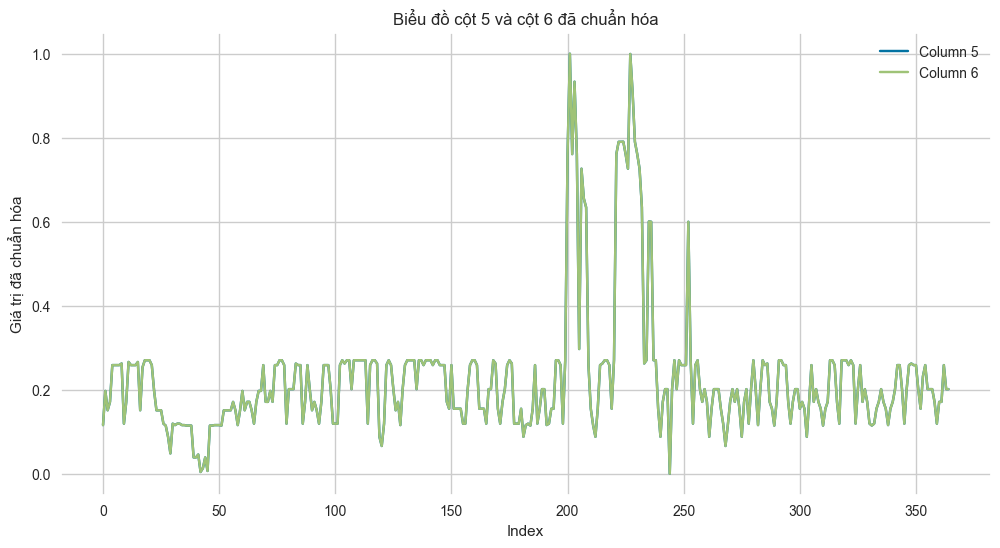

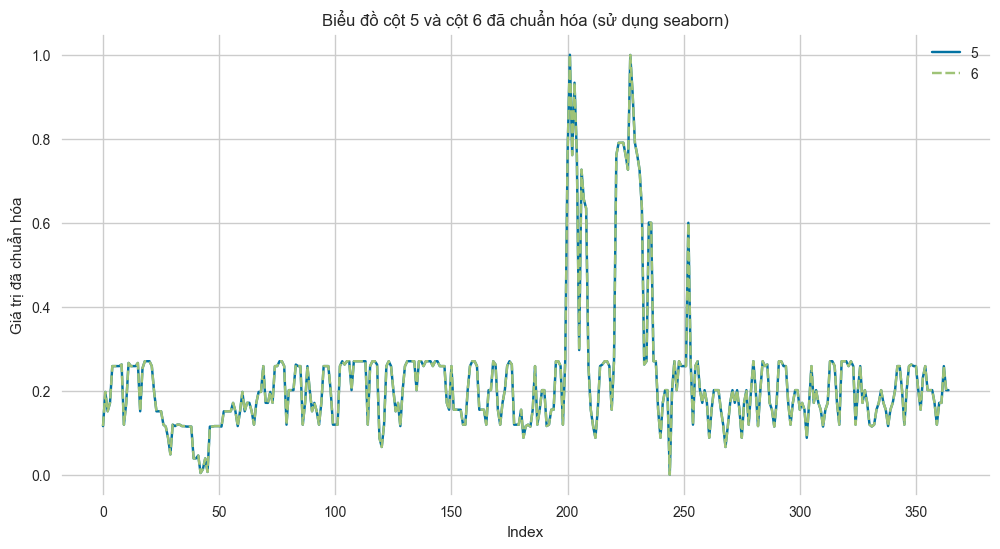

In [46]:
# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(scaled_df['5'], label='Column 5')
plt.plot(scaled_df['6'], label='Column 6')
plt.title('Biểu đồ cột 5 và cột 6 đã chuẩn hóa')
plt.xlabel('Index')
plt.ylabel('Giá trị đã chuẩn hóa')
plt.legend()
plt.show()

# Sử dụng seaborn để vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=scaled_df)
plt.title('Biểu đồ cột 5 và cột 6 đã chuẩn hóa (sử dụng seaborn)')
plt.xlabel('Index')
plt.ylabel('Giá trị đã chuẩn hóa')
plt.show()

3.Sử dụng LSTM

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense

         5       6
0    964.4   964.4
1   1019.7  1019.7
2    988.4   988.4
3   1002.0  1002.0
4   1061.5  1061.5
5   1061.5  1061.5
6   1061.5  1061.5
7   1061.5  1061.5
8   1064.1  1064.1
9    966.7   966.7
10  1002.0  1002.0
11  1066.6  1066.6
12  1061.5  1061.5
13  1061.5  1061.5
14  1061.5  1061.5
15  1066.6  1066.6
16   988.4   988.4
17  1058.0  1058.0
18  1069.4  1069.4
19  1069.4  1069.4
           5         6
0   0.115769  0.115769
1   0.197117  0.197117
2   0.151074  0.151074
3   0.171080  0.171080
4   0.258605  0.258605
5   0.258605  0.258605
6   0.258605  0.258605
7   0.258605  0.258605
8   0.262430  0.262430
9   0.119153  0.119153
10  0.171080  0.171080
11  0.266108  0.266108
12  0.258605  0.258605
13  0.258605  0.258605
14  0.258605  0.258605
15  0.266108  0.266108
16  0.151074  0.151074
17  0.253457  0.253457
18  0.270227  0.270227
19  0.270227  0.270227


c:\Users\FPT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 50)          │        10,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,902 (120.71 KB)

 Trainable params: 30,902 (120.71 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0790 - val_loss: 0.0250
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0387 - val_loss: 0.0102
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0222 - val_loss: 0.0216
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0220 - val_loss: 0.0110
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0179 - val_loss: 0.0102
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0174 - val_loss: 0.0114
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0155 - val_loss: 0.0133
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0152 - val_loss: 0.0120
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0189 - val_loss: 0.0117
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0151 - val_loss: 0.0123
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0153 - val_loss: 0.0110
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0146 - val_loss: 0.0109
E

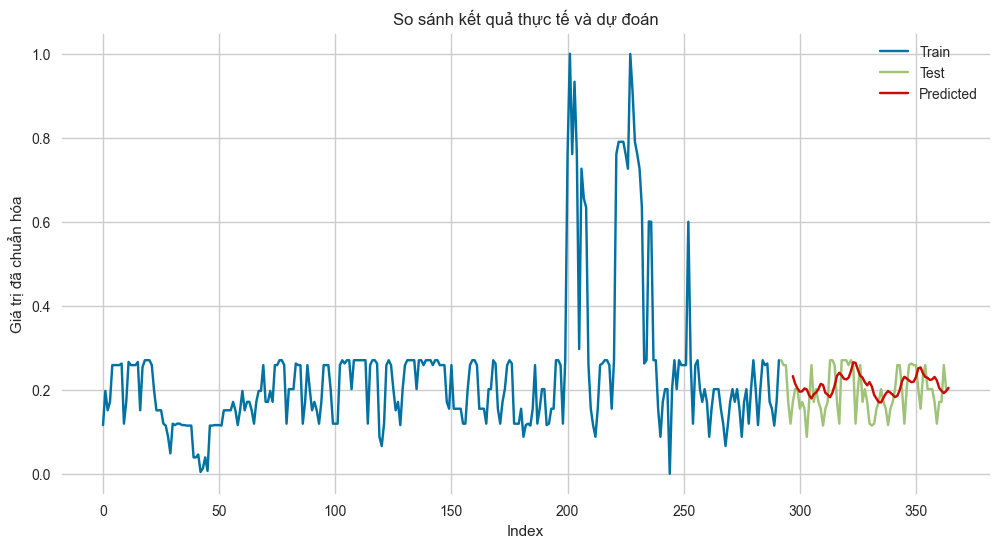

In [49]:
# Chọn các cột cần thiết
feats = ['5', '6']
selected_data = df[feats]
print(selected_data.head(20))

# Sử dụng MinMaxScaler để chuẩn hóa các cột đã chọn về khoảng 0-1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(selected_data)
scaled_df = pd.DataFrame(scaled_data, columns=feats)
print(scaled_df.head(20))

# Chuẩn bị dữ liệu cho LSTM
window_size = 5

def create_windowed_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Chia dữ liệu thành train và test
split_ratio = 0.8
split_index = int(len(scaled_df) * split_ratio)
train_data = scaled_df.values[:split_index]
test_data = scaled_df.values[split_index:]

# Tạo dữ liệu train và test theo cửa sổ thời gian
X_train, y_train = create_windowed_dataset(train_data, window_size)
X_test, y_test = create_windowed_dataset(test_data, window_size)

# Thay đổi hình dạng của dữ liệu để phù hợp với LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(window_size, X_train.shape[2])))
model.add(LSTM(50))
model.add(Dense(X_train.shape[2]))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Dự đoán trên dữ liệu test
predictions = model.predict(X_test)

# Vẽ biểu đồ so sánh kết quả thực tế và dự đoán
plt.figure(figsize=(12, 6))
plt.plot(range(len(train_data)), train_data[:, 0], label='Train')
plt.plot(range(len(train_data), len(train_data) + len(test_data)), test_data[:, 0], label='Test')
plt.plot(range(len(train_data) + window_size, len(train_data) + window_size + len(predictions)), predictions[:, 0], label='Predicted')
plt.title('So sánh kết quả thực tế và dự đoán')
plt.xlabel('Index')
plt.ylabel('Giá trị đã chuẩn hóa')
plt.legend()
plt.show()